In [12]:
import pandas as pd
import math
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [2]:
# parameters
iteration = 200000   # number of iterations
temp = 5   # initial temperature
prob_0 = 1   # constant
c = 0.999   # used for updating the probability
count = 0   # count of the successful solution update

In [3]:
# read csv file
file_path = './Trip_Matrix.csv'
df = pd.read_csv(file_path)
df

In [5]:
# store the values into a numpy array
trip = df.iloc[:, 1:].values

In [6]:
# define a function that can compute the fitness value of the solution
def cal_fitness_8(m, sol):
    M = np.zeros(2)
    for i in range(2):
        M[i] = m[sol[i]-1,sol[i+1]-1]
    N = m[sol[3]-1,sol[4]-1]
    O = m[sol[5]-1,sol[6]-1]
    P = m[sol[7]-1,sol[8]-1]
    Q = m[sol[9]-1,sol[10]-1]
    R = m[sol[11]-1,sol[12]-1]
    S = m[sol[13]-1,sol[14]-1]
    T = m[sol[15]-1,sol[16]-1]
    fitness = np.sum(M) + N + O + P + Q + R + S + T
    return fitness

In [7]:
# create an array to store all individuals
sol_hist = np.zeros([iteration+1,17])

# create an array to store all fitness values corresponding to the individual
fitness_hist = np.zeros(iteration+1)

# initialize the fitness array
for i in range(iteration+1):
    fitness_hist[i] = 99999


In [8]:
# generate the initial solution
initial_sol = np.arange(1,18)
random.shuffle(initial_sol)
initial_sol = initial_sol.astype(int)

In [9]:
# compute the fitness of the initial solution
sol_hist[0] = initial_sol
fitness_hist[0] = cal_fitness_8(trip, initial_sol)

In [11]:
running_time = np.zeros(iteration)
best_outputs = []
# implementation of simulated annealing
for i in range(1,iteration+1):

    # record the starting time
    start_time = time.time()

    # generate new solution
    a = random.randint(0,16)
    b = random.randint(0,16)
    sol_hist[i] = sol_hist[i-1]
    sol_hist[i,a] = sol_hist[i-1,b]
    sol_hist[i,b] = sol_hist[i-1,a]
    sol = sol_hist[i]
    sol = sol.astype(int)

    # compute the fitness of the new solution
    fitness_hist[i] = cal_fitness_8(trip, sol)

    if fitness_hist[i] > fitness_hist[i-1]:
        count = count + 1
        prob = math.exp(-(abs(fitness_hist[i]-fitness_hist[i-1]))/temp)*prob_0
        r = np.random.random()
        if r > prob:
            sol_hist[i] = sol_hist[i-1]

    # implementation of adaptive SA using Rechenberg's '1/5 success rule'
    if i % 100 == 0:   # implement every 100 iterations
        if count/i < 0.2:   # not very successful if true
            prob_0 = prob_0*c   # decrease search step in order to achieve exploitation/intensification
        if count/i > 0.2:   # too successful if true
            prob_0 = prob_0/c   # increase search step in order to achieve exploration/diversification

    # update the annealing temperature
    temp = temp*0.999

    # record the best output for every iteration
    best_outputs.append(np.min(fitness_hist))

    # compute and store the running time
    running_time[i-1] = time.time() - start_time

In [13]:
# return the index of the solution corresponding to the best fitness
best_index = np.where(fitness_hist == np.min(fitness_hist))

running_time = running_time.cumsum()

print("The best solution is:", sol_hist[best_index].astype(int))
print('The best fitness value is:', fitness_hist[best_index])

The best solution is: [[ 4 17 12  3  7 10  2  9  1  5 16  8 13 11  6 15 14]]
The best fitness value is: [20.6]


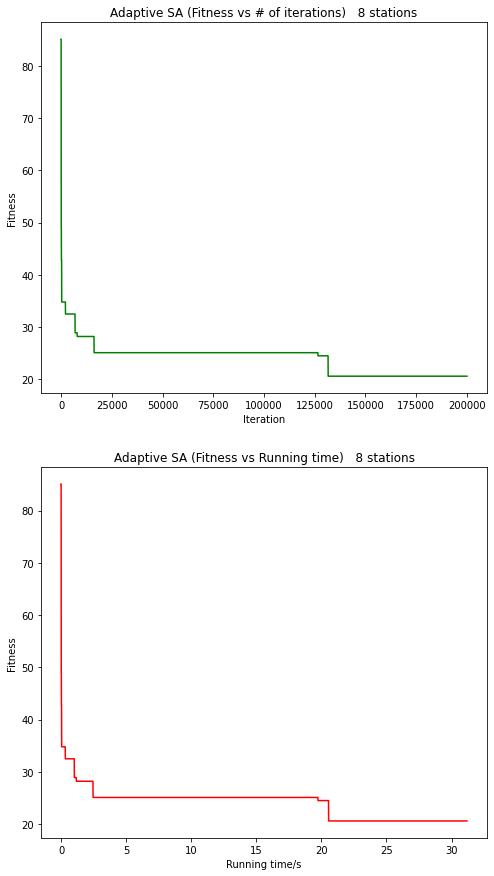

In [14]:
fig, ax = plt.subplots(2, figsize = (8,15))
ax[0].plot(best_outputs, 'green')
ax[0].set_xlabel("Iteration", fontsize = 10)
ax[0].set_ylabel("Fitness", fontsize = 10)
ax[0].set_title("Adaptive SA (Fitness vs # of iterations)   8 stations", fontsize = 12)

ax[1].plot(running_time, best_outputs, 'red')
ax[1].set_xlabel("Running time/s", fontsize = 10)
ax[1].set_ylabel("Fitness", fontsize = 10)
ax[1].set_title("Adaptive SA (Fitness vs Running time)   8 stations", fontsize = 12)
plt.show()